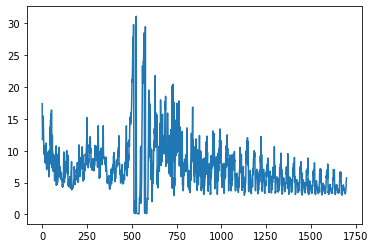

(1700,)


In [109]:
from rpca.omwrpca import omwrpca
import numpy as np 
from rpca.stoc_rpca import stoc_rpca
from rpca.omwrpca_cp import omwrpca_cp
from simulation.criteria import evaluate
import math
import matplotlib.pyplot as plt
import pandas as pd


results = {}

#simulate the data
# U0 = np.random.randn(m,r)
# Utilde = []
# K = int(math.ceil(float(n)/n_p))    
# for k in range(K):
#     Utemp = np.random.randn(m,r)
#     Utemp[:,r0:] = 0
#     Utilde.append(Utemp)
# #    U0 = scipy.linalg.orth(U0)
# V0 = np.random.randn(n + burnin,r)
# L0 = U0.dot(V0[:burnin,:].transpose())
# U = U0
# for k in range(n):
#     i = k // n_p
#     U += 1.0/n_p*Utilde[i]
#     L0 = np.hstack((L0, U.dot(V0[burnin+k, :]).reshape(m,1)))
# S0 = (np.random.uniform(0, 1, size=(m,n + burnin)) < rho).astype(int) * np.random.uniform(-1000, 1000, size=(m,n + burnin))
# M0 = L0+S0
# # save random generator state            
# random_state = np.random.get_state()


#stoc_RPCA
# start = timer()
# Lhat, Shat, rank, Uhat = stoc_rpca(M0, burnin, lam=100, mu=0.01)
# Lhat, Shat, rank, Uhat = stoc_rpca(M0, burnin)
# results['stoc_rpca'] = evaluate(Lhat, Shat, L0, S0, r, U0, burnin)
# end = timer()       

# mydata = np.concatenate((np.random.randn(1000), 0.1*np.random.randn(1000)+1))
# mydata = np.concatenate((mydata, 0.6*np.random.randn(1000)-2))

# plt.plot(mydata)
# plt.show()


# M0 = np.resize(mydata, (1,len(mydata)))
# print(M0.shape)


fileName = "data/torque.xlsx"
torqueDataFrame = pd.read_excel(fileName)
# print(torqueDataFrame)      # 3440*2

torqueData = np.asarray(torqueDataFrame)
torqueData = torqueData[:,1]

# mydata = np.concatenate((np.random.randn(1000), np.random.randn(1000)+5))
# mydata = np.concatenate((mydata, np.random.randn(1000)-3))

mydata = torqueData[1500:3200]
plt.plot(mydata)
plt.show()

print(mydata.shape)
# mydata = np.resize(mydata, (1,len(mydata)))
# print(mydata.shape)

window_size = 52
X = np.zeros((window_size,len(mydata)-window_size+1))

for i in range(len(mydata)-window_size+1):
    X[:,i] = mydata[i:i+window_size]

In [114]:
burnin= 200
m=1
r = 10
r0 = 5
rho = 0.1

# pms['nrep'] = 50
# pms['seed'] = 12345

# omwrpca params
win_size = 100
track_cp_burnin = 200
n_check_cp = 2
alpha = 0.01
proportion = 0.5
n_positive = 3
min_test_size = 100
tolerance_num = 0
factor = 1
n_p = 250


Lhat, Shat, rank, cp, num_sparses = omwrpca_cp(X, burnin, win_size, track_cp_burnin, n_check_cp, alpha, proportion, n_positive, min_test_size, 
                                                tolerance_num=tolerance_num, lambda1=1.0/np.sqrt(m), lambda2=1.0/np.sqrt(m)*(10**2), factor=factor)



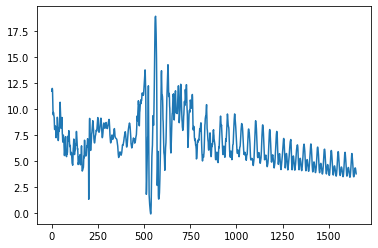

In [118]:
plt.plot(Lhat[2,:])
plt.show()

In [120]:
rank

[28]